In [2]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

N_10_b = np.genfromtxt(f"../../Data/fixed_G_N_10_b.csv", delimiter=",")
N_100_b = np.genfromtxt(f"../../Data/fixed_G_N_100_b.csv", delimiter=",")
N_1000_b = np.genfromtxt(f"../../Data/fixed_G_N_1000_b.csv", delimiter=",")


plot_traj_b = np.empty(shape=(10, 4))

box_b = np.empty(shape=(30, 2))


for i in range(10):
    plot_traj_b[i, 0] = i + 1
    plot_traj_b[i, 1] = N_10_b[:, 0][i]
    plot_traj_b[i, 2] = N_100_b[:, 0][i]
    plot_traj_b[i, 3] = N_1000_b[:, 0][i]



for j in range(30):
    if j < 10:
        box_b[j, 0] = N_10_b[:, 0][j]
        box_b[j, 1] = "10"


    elif 10 <= j < 20:
        box_b[j, 0] = N_100_b[:, 0][j - 10]
        box_b[j, 1] = "100"

    else:
        box_b[j, 0] = N_1000_b[:, 0][j - 20]
        box_b[j, 1] = "1000"






In [3]:
mle_b = np.genfromtxt("../../Data/MLE_b.csv", delimiter=",")

test_b = N_1000_b[:, 0]


mle_N = ["MLE_1000"] * 10
mle_B = {"b": mle_b, "N": mle_N}
df_mle_b = pd.DataFrame(mle_B, columns=("b", "N"))


df_b = pd.DataFrame(box_b)

df_b.columns = ["b", "N"]

df_b = pd.concat([df_b, df_mle_b])

<Axes: xlabel='N', ylabel='b'>

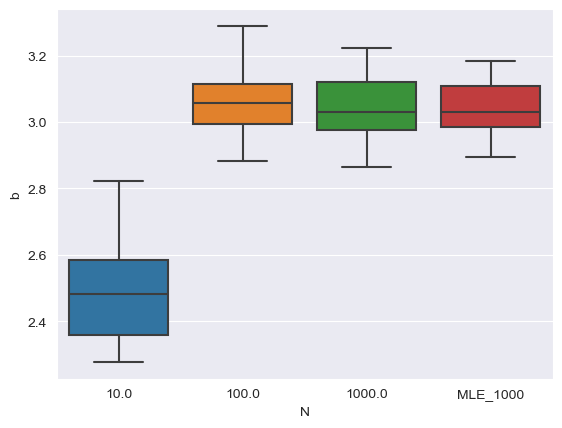

In [4]:
sns.boxplot(df_b, x="N", y="b")

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

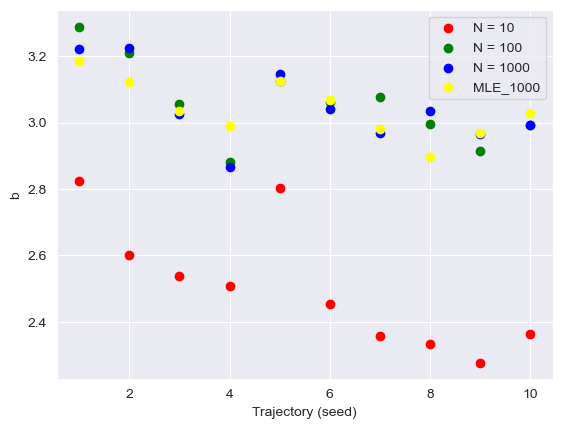

In [5]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:, 0], plot_traj_b[:, 1], color="red", label="N = 10")
ax0.scatter(plot_traj_b[:, 0], plot_traj_b[:, 2], color="green", label="N = 100")
ax0.scatter(plot_traj_b[:, 0], plot_traj_b[:, 3], color="blue", label="N = 1000")
ax0.scatter(plot_traj_b[:, 0], mle_b, color="yellow", label="MLE_1000")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("b")
ax0.legend()
fig.show


In [6]:
print(sp.stats.ttest_rel(mle_b,test_b))

TtestResult(statistic=-0.41162545357472874, pvalue=0.6902439688299518, df=9)


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

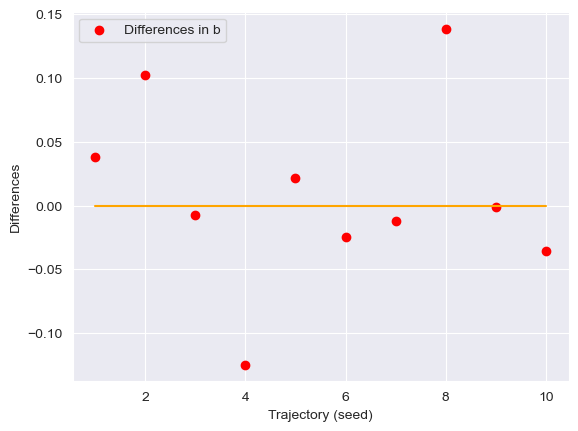

In [8]:
differences_b = plot_traj_b[:,3] - mle_b
zero = [0]*10
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:,0],differences_b, color = "red", label = "Differences in b")
ax0.plot(plot_traj_b[:,0],zero, color = "orange")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("Differences")
ax0.legend()
fig.show